# 调参+TensorFlow(不完整)

+ 初始化变量
+ 创建自己的会话（session）
+ 训练算法
+ 实现神经网络

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

In [3]:
y_hat=tf.constant(36,name='y_hat')
y=tf.constant(39,name='y')

loss=tf.Variable((y-y_hat)**2,name='loss')
init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)
    print(session.run(loss))

AttributeError: module 'tensorflow' has no attribute 'global_variables_initializer'

tf.matmul(..., ...)进行矩阵乘法
tf.add(..., ...)进行加法
np.random.randn(...)随机初始化

In [14]:
# GRADED FUNCTION: linear_function

def linear_function():
    """
    Implements a linear function: 
            Initializes W to be a random tensor of shape (4,3)
            Initializes X to be a random tensor of shape (3,1)
            Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result -- runs the session for Y = WX + b 
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (4 lines of code)  
    X = tf.constant(np.random.randn(3,1), name = "X")  
    W = tf.constant(np.random.randn(4,3), name = "W")  
    b = tf.constant(np.random.randn(4,1), name = "b")  
    Y = tf.add(tf.matmul(W,X),b)  
    ### END CODE HERE ###   
      
    # Create the session using tf.Session() and run it with sess.run(...) on the variable you want to calculate  
      
    ### START CODE HERE ###  
    sess = tf.compat.v1.Session()  
    result = sess.run(Y)  
    ### END CODE HERE ###   
    
    # close the session 
    sess.close()

    return result

In [15]:
print( "result = " + str(linear_function()))

RuntimeError: The Session graph is empty.  Add operations to the graph before calling run().

In [16]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    results -- the sigmoid of z
    """
    
    ### START CODE HERE ### ( approx. 4 lines of code)  
    # Create a placeholder for x. Name it 'x'.  
    x = tf.placeholder(tf.float32, name = "x")  
  
    # compute sigmoid(x)  
    sigmoid = tf.sigmoid(x)  
  
    # Create a session, and run it. Please use the method 2 explained above.   
    # You should use a feed_dict to pass z's value to x.   
    with tf.compat.v1.Session() as sess:  
        # Run session and call the output "result"  
        result = sess.run(sigmoid,feed_dict={x:z})   #actually,the sigmoid here is equal to tf.sigmoid(x)
      
    ### END CODE HERE ###  
    
    return result

In [17]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [18]:
def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Note: What we've been calling "z" and "y" in this class are respectively called "logits" and "labels" 
    in the TensorFlow documentation. So logits will feed into z, and labels into y. 
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """
    
    ### START CODE HERE ###   
      
    # Create the placeholders for "logits" (z) and "labels" (y) (approx. 2 lines)  
    z = tf.placeholder(tf.float32, name = "z")  
    y = tf.placeholder(tf.float32, name = "y")  
      
    # Use the loss function (approx. 1 line)  
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z,labels=y)  
      
    # Create a session (approx. 1 line). See method 1 above.  
    sess = tf.Session()  
      
    # Run the session (approx. 1 line).  
    cost = sess.run(cost,feed_dict={z:logits,y:labels})  
      
    # Close the session (approx. 1 line). See method 1 above.  
    sess.close()  
      
    ### END CODE HERE ###  
    
    return cost

In [19]:
logits = sigmoid(np.array([0.2,0.4,0.7,0.9]))
cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [20]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 5


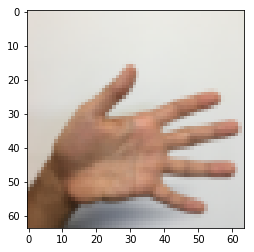

In [21]:
# Example of a picture
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [22]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


In [23]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    ### START CODE HERE ### (approx. 2 lines)  
    X = tf.placeholder(shape=[n_x, None],dtype=tf.float32)  
    Y = tf.placeholder(shape=[n_y, None],dtype=tf.float32)  
    ### END CODE HERE ###  
    
    return X, Y

In [24]:
W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))  
b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())

AttributeError: module 'tensorflow' has no attribute 'get_variable'